In [1]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

%matplotlib inline

### Movie info

In [2]:
# Read in the data as movie_info
# Use parse_dates and pass column name to read it as a datetime
movie_info = pd.read_csv('Data/rt.movie_info.tsv', encoding='latin-1', sep='\t', 
                        parse_dates=['theater_date', 'dvd_date'])
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200 minutes,NaN


In [3]:
# Info on the dataframe
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 146.4+ KB


In [4]:
movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

### Question 1: Does runtime help or hurt movie performance?

In [5]:
movie_info['runtime'].value_counts()

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
               ..
153 minutes     1
152 minutes     1
64 minutes      1
183 minutes     1
63 minutes      1
Name: runtime, Length: 142, dtype: int64

In [6]:
movie_info['runtime']

0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1560, dtype: object

We will change the type of runtime column into actual numbers so we can work on it

In [7]:
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes',"")
movie_info['runtime'] = pd.to_numeric(movie_info['runtime'])

In [8]:
movie_info['runtime'].min()

5.0

In [9]:
movie_info['runtime']

0       104.0
1       108.0
2       116.0
3       128.0
4       200.0
        ...  
1555    106.0
1556     88.0
1557    111.0
1558    101.0
1559     94.0
Name: runtime, Length: 1560, dtype: float64

In [10]:
lowest_five_runtime = movie_info.sort_values('runtime', ascending=True)
lowest_five_runtime.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1358,1753,Carmel Myers' co-star in this amusing farce is...,NR,Comedy,Paul Powell,NaN,NaT,NaT,NaN,NaN,5.0,NaN
540,707,James Pierce is one of the lesser-known film T...,NR,Action and Adventure,NaN,NaN,NaT,NaT,NaN,NaN,6.0,NaN
273,361,NaN,NR,Drama|Special Interest,Roberto Sanchez Santos,NaN,NaT,NaT,NaN,NaN,7.0,NaN
950,1229,A short fashion film.,NR,Documentary,NaN,NaN,NaT,NaT,NaN,NaN,10.0,NaN
983,1275,"Desperately seeking to save his marriage, Bren...",NR,Drama,Jen McGowan,Colin Pink|Jen McGowan,NaT,NaT,NaN,NaN,11.0,NaN


In [11]:
highest_five_runtime = movie_info.sort_values('runtime', ascending=False)
highest_five_runtime.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
639,823,Directed by Marco Tullio Giordana and La Megli...,R,Art House and International|Drama|Romance,Marco Tullio Giordana,Stefano Rulli|Sandro Petraglia,2003-06-22,2006-02-07,NaN,NaN,358.0,Miramax Films
508,666,"After twenty-five years, a trio of old high sc...",NR,Drama|Mystery and Suspense,Paul Wendkos,NaN,NaT,NaT,NaN,NaN,313.0,NaN
1111,1434,When a pay cut sends Australian dock workers o...,NR,Drama|Romance,Chris Thomson,NaN,NaT,NaT,NaN,NaN,294.0,NaN
1490,1918,A collection of 15 chapters from Tarzan and th...,NR,Action and Adventure|Classics|Documentary,Henry MacRae|Harry McRae,William Lord Wright|Ian McCloskey Heath,1929-10-01,2006-10-24,NaN,NaN,290.0,NaN
1029,1332,Based on the classic Nathaniel Hawthorne novel...,NR,Drama|Television,Rick Hauser,NaN,NaT,NaT,NaN,NaN,240.0,NaN


In [12]:
print(movie_info['runtime'].min())
print(movie_info['runtime'].max())

5.0
358.0


Let's visualize our results

Mean Value for Runtime column: 103.96797385620916
Median Value for Runtime column: 100.0


C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


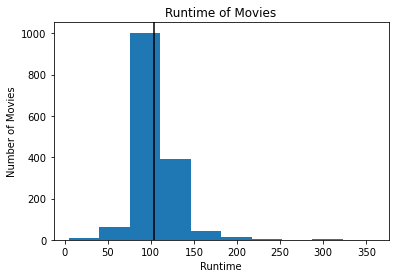

In [13]:
runtime_mean = movie_info['runtime'].mean()
runtime_median = movie_info['runtime'].median()

fig, ax = plt.subplots()

ax.hist(movie_info['runtime'])
plt.axvline(x = movie_info['runtime'].mean(), color = 'black')
ax.set_title("Runtime of Movies")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of Movies")

print("Mean Value for Runtime column: {}".format(runtime_mean))
print("Median Value for Runtime column: {}".format(runtime_median))

From the visualization above, we can see the data has a slightly positive skew.

**Dropping rows that contain missing values:**
runtime column contains 30 null values in this case we will simply drop any rows that contain them.
The number dropped does not constitute a significant portion of our dataset, so dropping the values is an acceptable loss

In [14]:
movie_info = movie_info.dropna(subset=['runtime'])
movie_info.isna().sum()

id                 0
synopsis          45
rating             0
genre              4
director         185
writer           430
theater_date     336
dvd_date         336
currency        1192
box_office      1192
runtime            0
studio          1041
dtype: int64

### Budgets

In [15]:
budgets = pd.read_csv('Data/tn.movie_budgets.csv')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [16]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Movie Gross

In [17]:
gross = pd.read_csv('Data/bom.movie_gross.csv')
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [18]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Reviews

In [19]:
reviews = pd.read_csv('Data/rt.reviews.tsv',encoding='latin-1', sep='\t',
                     parse_dates=['date'])
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,2002-09-24
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,2003-09-07


In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          54432 non-null  int64         
 1   review      48869 non-null  object        
 2   rating      40915 non-null  object        
 3   fresh       54432 non-null  object        
 4   critic      51710 non-null  object        
 5   top_critic  54432 non-null  int64         
 6   publisher   54123 non-null  object        
 7   date        54432 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 3.3+ MB


In [21]:
# getting only the year in release_date to make things simpler
# Coercion is the implicit conversion of an instance of one type to another
# during an operation which involves two arguments of the same type.
reviews['year'] = pd.to_datetime(reviews['date'], errors='coerce').apply(lambda x: str(x).split('-')
                                                                       [0] if x != np.nan else np.nan)
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date,year
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,2018
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23,2018
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,2018
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16,2017
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12,2017
...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,2002-09-24,2002
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21,2005
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17,2005
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,2003-09-07,2003


### tmdb Movies

In [22]:
tmdb = pd.read_csv('Data/tmdb.movies.csv', index_col=0, parse_dates=['release_date'])
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [23]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [24]:
# it looks like we don't have any null values, but just to confirm:
tmdb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [25]:
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


### Look at Movies by popularity

Top Ten movies:

In [26]:
top_ten_movies_by_pop=tmdb.pivot_table(values='popularity',index="original_title").sort_values(ascending=False,by='popularity').head(10)
top_ten_movies_by_pop

,popularity
original_title,
Avengers: Infinity War,80.773
John Wick,78.123
Spider-Man: Into the Spider-Verse,60.534
The Hobbit: The Battle of the Five Armies,53.783
The Avengers,50.289
Guardians of the Galaxy,49.606
Blade Runner 2049,48.571
Fantastic Beasts: The Crimes of Grindelwald,48.508
Ralph Breaks the Internet,48.057


Bottom Ten movies

In [27]:
Bottom_ten_movies_by_pop=tmdb.pivot_table(values='popularity',index="original_title").sort_values(ascending=True,by='popularity').head(10)
Bottom_ten_movies_by_pop

,popularity
original_title,
"""BLESSED""",0.6
Lenny Cooke,0.6
Leolex,0.6
Leonard Cohen - Songs from the Road,0.6
Leonard in Slow Motion,0.6
Leones,0.6
Leopard,0.6
Les Profs,0.6
Lemonade + Ducktape Stuffs,0.6


### Looking into release date to see which is the best month to release movies

In [28]:
tmdb['release_date'].value_counts()

2010-01-01    269
2011-01-01    200
2014-01-01    155
2012-01-01    155
2013-01-01    145
             ... 
2013-02-17      1
2012-06-10      1
2018-04-02      1
2011-05-26      1
2015-04-06      1
Name: release_date, Length: 3433, dtype: int64

In [29]:
# getting only the year in release_date to make things simpler
# Coercion is the implicit conversion of an instance of one type to another
# during an operation which involves two arguments of the same type.
tmdb['year'] = pd.to_datetime(tmdb['release_date'], errors='coerce').apply(lambda x: str(x).split('-')
                                                                       [0] if x != np.nan else np.nan)
tmdb['month'] = pd.to_datetime(tmdb['release_date'], errors='coerce').apply(lambda x: str(x).split('-')
                                                                       [1] if x != np.nan else np.nan)
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,03
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,05
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,07
...,...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,05
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,06


In [30]:
tmdb.sort_values('year', ascending=True)
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,03
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,05
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,07
...,...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,05
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,06


In [31]:
tmdb['year'].astype(int)

0        2010
1        2010
2        2010
3        1995
4        2010
         ... 
26512    2018
26513    2018
26514    2018
26515    2018
26516    2018
Name: year, Length: 26517, dtype: int32

In [32]:
tmdb['month'].astype(int)

0        11
1         3
2         5
3        11
4         7
         ..
26512    10
26513     5
26514    10
26515     6
26516    10
Name: month, Length: 26517, dtype: int32

In [33]:
tmdb['year'].value_counts()

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
        ... 
1976       1
1964       1
1977       1
1962       1
1939       1
Name: year, Length: 66, dtype: int64

### SQL database

In [34]:
conn = sqlite3.connect('im.db')

In [35]:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [36]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [37]:
directors = pd.read_sql("SELECT * FROM directors;", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [38]:
known_for = pd.read_sql("SELECT * FROM known_for;", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [39]:
movie_akas = pd.read_sql("SELECT * FROM movie_akas;", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [40]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [41]:
persons = pd.read_sql("SELECT * FROM persons;", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [42]:
principals = pd.read_sql("SELECT * FROM principals;", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [43]:
writers = pd.read_sql("SELECT * FROM writers;", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825
